## Demographic Data In San Bernardino + Riverside

### Race & Housing (Rent/Own)

In [1]:
#get cenpy
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()

In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
#look at tables
#acs.filter_tables('OCCUPATION', by='description')

In [4]:
#Race = table B02001
# Housing - table 'B19013_001E':'Median HH Income','B25003_001E':'Total Occupied','B25003_002E':'Owner Occupied','B25003_003E':'Renter Occupied'
riverside = products.ACS(2019).from_county('Riverside, CA', level='tract',
                                        variables=['B02001','B19013_001E','B25003_001E','B25003_002E','B25003_003E'])

SB = products.ACS(2019).from_county('San Bernardino, CA', level='tract', variables=['B02001','B19013_001E','B25003_001E','B25003_002E','B25003_003E'])

#LA = products.ACS(2019).from_county('Los Angeles, CA', level='tract',variables=['B02001','B19013_001E','B25003_001E','B25003_002E','B25003_003E'])

C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [5]:
#create a single gdf using code from https://gis.stackexchange.com/questions/162659/joining-concat-list-of-similar-dataframes-in-geopandas 
gdf = gpd.GeoDataFrame(pd.concat([riverside,SB], ignore_index=True), crs=riverside.crs)

In [6]:
gdf.rename(columns={
                'B19013_001E':'Median HH Income', 'B25003_001E':'Total Occupied','B25003_002E':'Owner Occupied','B25003_003E':'Renter Occupied',
            'B02001_001E': 'Total Pop',
                'B02001_002E':'White alone',
                "B02001_003E": "Black or African American alone", 
                "B02001_004E": "American Indian and Alaska Native alone",
                "B02001_005E": "Asian alone",
                "B02001_006E": "Native Hawaiian and Other Pacific Islander alone",
                "B02001_007E": "Some other race alone",
                "B02001_008E": "Two or more races:",
                "B02001_009E": "Two races including Some other race",
                "B02001_010E": "Two races excluding Some other race, and three or more races"}, inplace=True)

In [7]:
#gdf.columns.values.tolist()

In [8]:
race_cols = [ 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races:',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races']

In [9]:
for col in race_cols:
    gdf["Percent " + col] = (gdf[col]/gdf['Total Pop']) * 100

In [10]:
gdf = gdf.drop(race_cols, axis=1)

In [11]:
gdf['Percent Owner Occupied'] = (gdf['Owner Occupied']/gdf['Total Occupied']) * 100
gdf['Percent Renter Occupied'] = (gdf['Renter Occupied']/gdf['Total Occupied']) * 100

In [12]:
gdf = gdf.drop(['Total Occupied',
 'Owner Occupied',
 'Renter Occupied',], axis=1)

In [13]:
gdf.head(3)

,GEOID,geometry,Total Pop,Median HH Income,NAME,state,county,tract,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races:,Percent Two races including Some other race,"Percent Two races excluding Some other race, and three or more races",Percent Owner Occupied,Percent Renter Occupied
0,06065041904,"POLYGON ((-13099233.990 4011396.270, -13099207...",5391.0,107880.0,"Census Tract 419.04, Riverside County, California",06,065,041904,64.756075,1.279911,0.741977,8.662586,0.556483,22.352068,1.650900,0.964571,0.686329,89.201183,10.798817
1,06065041702,"POLYGON ((-13089529.040 4010560.230, -13089521...",5185.0,79283.0,"Census Tract 417.02, Riverside County, California",06,065,041702,78.842816,2.179364,0.000000,1.832208,0.000000,10.896818,6.248795,5.400193,0.848602,74.360847,25.639153
2,06065041500,"POLYGON ((-13096164.800 4014145.990, -13096149...",3263.0,60735.0,"Census Tract 415, Riverside County, California",06,065,041500,63.745020,6.068036,1.777505,4.934110,0.919399,21.391358,1.164572,0.490346,0.674226,16.544790,83.455210


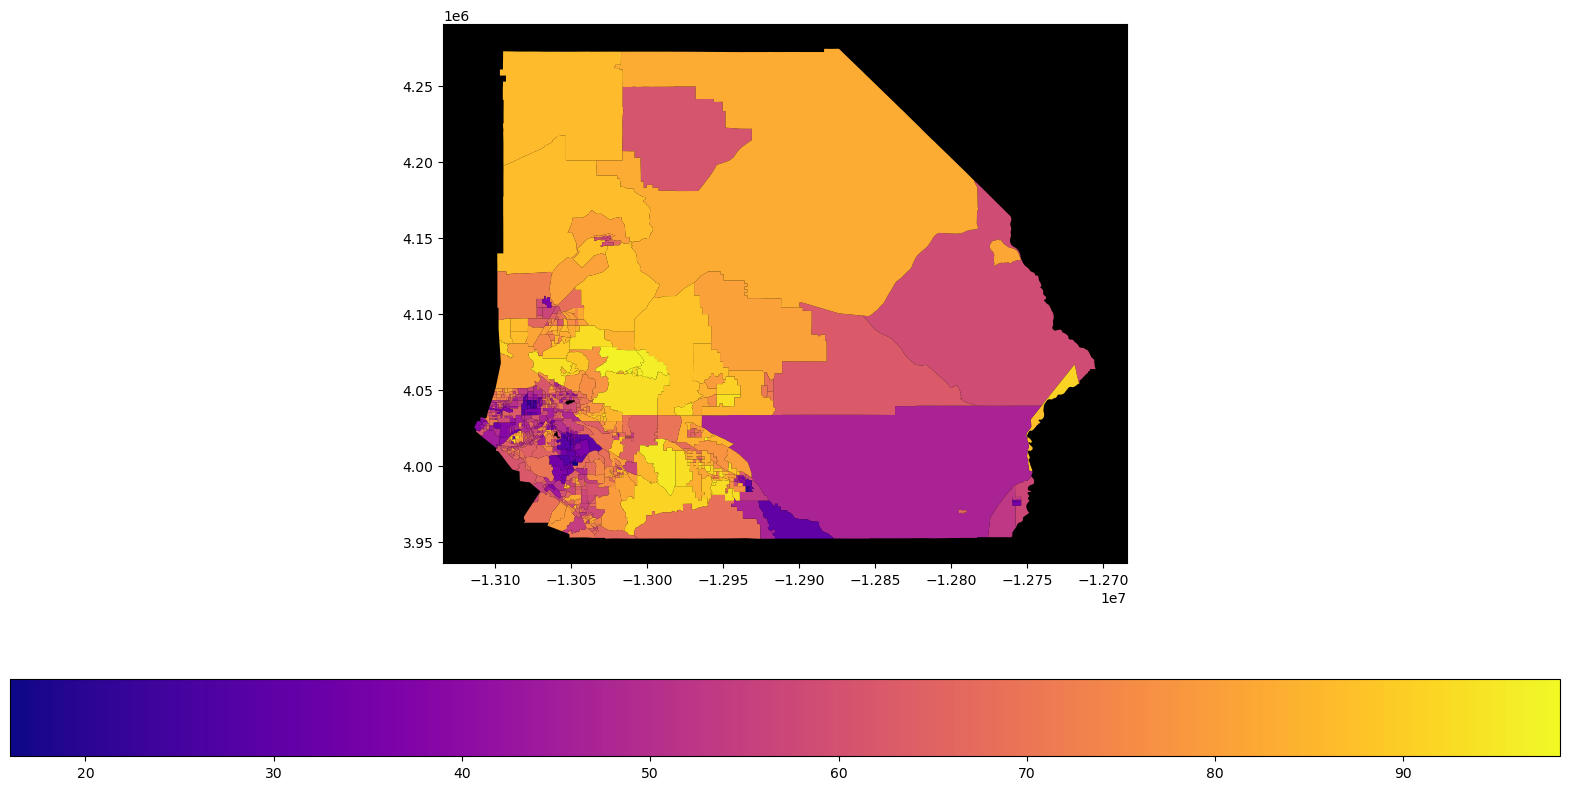

In [14]:
import matplotlib.pyplot as plt 

# create a matplotlib figure and axis object
fig, ax = plt.subplots(figsize=(20,10))

gdf.plot('Percent White alone', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'horizontal'})
ax.set_facecolor('k')

## Income

In [15]:
#Household income = table B19001

riverside_HI = products.ACS(2019).from_county('Riverside, CA', level='tract',
                                        variables='B19001')

SB_HI = products.ACS(2019).from_county('San Bernardino, CA', level='tract', variables='B19001')

#LA_HI = products.ACS(2019).from_county('Los Angeles, CA', level='tract',variables='B19001')

C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\geopandas\geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\cpugh\

In [16]:
HI_gdf = gpd.GeoDataFrame(pd.concat([riverside_HI,SB_HI], ignore_index=True), crs=riverside_HI.crs)

In [17]:
HI_gdf.head(1)

,GEOID,geometry,B19001A_001E,B19001A_002E,B19001A_003E,B19001A_004E,B19001A_005E,B19001A_006E,B19001A_007E,B19001A_008E,...,B19001_009E,B19001_010E,B19001_011E,B19001_012E,B19001_013E,B19001_014E,B19001_015E,B19001_016E,B19001_017E,NAME
0,06065041904,"POLYGON ((-13099233.990 4011396.270, -13099207...",1015.0,29.0,31.0,8.0,25.0,44.0,8.0,7.0,...,73.0,17.0,41.0,124.0,186.0,226.0,164.0,183.0,170.0,"Census Tract 419.04, Riverside County, California"


In [18]:
#drop extra columns
HI_gdf = HI_gdf[["B19001_001E", "B19001_002E"    ,
                "B19001_003E"     ,
                "B19001_004E"    ,
                "B19001_005E"    ,
                "B19001_006E"     ,
                "B19001_007E"     , 
                "B19001_008E"    ,
                "B19001_009E"   ,
                "B19001_010E" ,
                "B19001_011E" ,
                "B19001_012E",
                "B19001_013E"  ,
                "B19001_014E",
                "B19001_015E"   ,
                "B19001_016E",
                "B19001_017E",
                'geometry','GEOID']]

In [19]:
 #rename columns
HI_gdf.rename(columns={"B19001_001E":"Total:",       
                "B19001_002E":"<$10,000",       
                "B19001_003E": '$10,000-$14,999',     
                "B19001_004E":'$15,000 - $19,999',     
                "B19001_005E": '$20,000 - $24,999',     
                "B19001_006E":"$25,000 - $29,999",      
                "B19001_007E":"$30,000 - $34,999",       
                "B19001_008E":"$35,000 - $39,999",      
                "B19001_009E":  "$40,000 - $44,999",    
                "B19001_010E":  "$45,000 - $49,999",   
                "B19001_011E":  "$50,000 - $59,999",  
                "B19001_012E":  "$60,000 - $74,999",  
                "B19001_013E":  "$75,000 - $99,999",  
                "B19001_014E": "$100,000 - $124,999",    
                "B19001_015E":"$125,000 - $149,999",     
                "B19001_016E":"$150,000 - $199,999",   
                "B19001_017E": "$200,000 or more"}, inplace=True)

In [20]:
#get col names
#HI_gdf.columns.values.tolist()

In [21]:
#make list of income related cols
cols = [ '<$10,000',
 '$10,000-$14,999',
 '$15,000 - $19,999',
 '$20,000 - $24,999',
 '$25,000 - $29,999',
 '$30,000 - $34,999',
 '$35,000 - $39,999',
 '$40,000 - $44,999',
 '$45,000 - $49,999',
 '$50,000 - $59,999',
 '$60,000 - $74,999',
 '$75,000 - $99,999',
 '$100,000 - $124,999',
 '$125,000 - $149,999',
 '$150,000 - $199,999',
 '$200,000 or more']

In [22]:
#get household income percentages for tracts
for col in cols:
    HI_gdf["Percent " + col] = (HI_gdf[col]/HI_gdf['Total:']) * 100

In [23]:
#drop old columns
HI_gdf =  HI_gdf.drop(cols, axis=1)

In [24]:
HI_gdf.head(1)
                

,Total:,geometry,GEOID,"Percent <$10,000","Percent $10,000-$14,999","Percent $15,000 - $19,999","Percent $20,000 - $24,999","Percent $25,000 - $29,999","Percent $30,000 - $34,999","Percent $35,000 - $39,999","Percent $40,000 - $44,999","Percent $45,000 - $49,999","Percent $50,000 - $59,999","Percent $60,000 - $74,999","Percent $75,000 - $99,999","Percent $100,000 - $124,999","Percent $125,000 - $149,999","Percent $150,000 - $199,999","Percent $200,000 or more"
0,1352.0,"POLYGON ((-13099233.990 4011396.270, -13099207...",06065041904,2.14497,2.292899,0.591716,2.662722,3.62426,0.591716,0.517751,5.399408,1.257396,3.032544,9.171598,13.757396,16.715976,12.130178,13.535503,12.573964


## Education Level

In [25]:
#education level (population 25 years and older)  = B15003
riverside_educ = products.ACS(2019).from_county('Riverside, CA', level='tract',
                                        variables='B15003')

SB_educ = products.ACS(2019).from_county('San Bernardino, CA', level='tract', variables='B15003')

#LA_educ = products.ACS(2019).from_county('Los Angeles, CA', level='tract',variables='B15003')

C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [26]:
educ_gdf = gpd.GeoDataFrame(pd.concat([riverside_educ,SB_educ], ignore_index=True), crs=riverside_educ.crs)

In [27]:
  educ_gdf.rename(columns={"B15003_001E":"Total_Educ",
      'B15003_002E':'No schooling completed',
'B15003_017E':'Regular high school diploma',
'B15003_018E':'GED or alternative credential',
'B15003_021E':'Associates degree',
'B15003_022E':'Bachelors degree',
'B15003_023E':'Masters degree',
'B15003_024E':'Professional school degree',
'B15003_025E':'Doctorate degree'
                }, inplace=True)

In [28]:
#create col for some school but less than highschool degree
educ_gdf['less_highschool'] = educ_gdf.iloc[:,5:18].sum(axis=1)
#create col for some school post highschool but less than secondary degree
educ_gdf['some_college'] = educ_gdf.B15003_019E + educ_gdf.B15003_020E
educ_gdf['high school diploma'] = educ_gdf['Regular high school diploma'] + educ_gdf['GED or alternative credential']

In [29]:
educ_gdf.head()

,GEOID,geometry,Total_Educ,No schooling completed,B15003_003E,B15003_004E,B15003_005E,B15003_006E,B15003_007E,B15003_008E,...,Masters degree,Professional school degree,Doctorate degree,NAME,state,county,tract,less_highschool,some_college,high school diploma
0,06065041904,"POLYGON ((-13099233.990 4011396.270, -13099207...",3480.0,50.0,0.0,0.0,0.0,16.0,0.0,0.0,...,253.0,5.0,27.0,"Census Tract 419.04, Riverside County, California",06,065,041904,317.0,904.0,1062.0
1,06065041702,"POLYGON ((-13089529.040 4010560.230, -13089521...",3632.0,102.0,0.0,0.0,0.0,34.0,0.0,0.0,...,86.0,43.0,0.0,"Census Tract 417.02, Riverside County, California",06,065,041702,405.0,630.0,1498.0
2,06065041500,"POLYGON ((-13096164.800 4014145.990, -13096149...",2079.0,86.0,0.0,0.0,0.0,0.0,4.0,18.0,...,170.0,156.0,0.0,"Census Tract 415, Riverside County, California",06,065,041500,319.0,494.0,513.0
3,06065040809,"POLYGON ((-13087670.230 4014380.140, -13087646...",2625.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,...,124.0,21.0,36.0,"Census Tract 408.09, Riverside County, California",06,065,040809,263.0,449.0,808.0
4,06065040615,"POLYGON ((-13087499.580 4023599.500, -13087495...",6604.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,...,575.0,48.0,43.0,"Census Tract 406.15, Riverside County, California",06,065,040615,392.0,1489.0,1264.0


In [30]:
#educ_gdf.columns.values.tolist()

In [31]:
#drop columns we don't need
educ_gdf = educ_gdf[['GEOID', 
 'geometry',
 'Total_Educ',
 'No schooling completed',
 'high school diploma',
 'Associates degree',
 'Bachelors degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'NAME',
 'state',
 'county',
 'tract',
 'less_highschool',
 'some_college']]

In [32]:
cols =  ['No schooling completed',
 'high school diploma',
 'Associates degree',
 'Bachelors degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'less_highschool',
 'some_college']

In [33]:
for col in cols:
    educ_gdf["Percent " + col] = (educ_gdf[col]/educ_gdf['Total_Educ']) * 100

In [34]:
educ_gdf = educ_gdf.drop(cols, axis=1)

In [35]:
educ_gdf.head()

,GEOID,geometry,Total_Educ,NAME,state,county,tract,Percent No schooling completed,Percent high school diploma,Percent Associates degree,Percent Bachelors degree,Percent Masters degree,Percent Professional school degree,Percent Doctorate degree,Percent less_highschool,Percent some_college
0,06065041904,"POLYGON ((-13099233.990 4011396.270, -13099207...",3480.0,"Census Tract 419.04, Riverside County, California",06,065,041904,1.436782,30.517241,8.879310,15.890805,7.270115,0.143678,0.775862,9.109195,25.977011
1,06065041702,"POLYGON ((-13089529.040 4010560.230, -13089521...",3632.0,"Census Tract 417.02, Riverside County, California",06,065,041702,2.808370,41.244493,9.003304,14.895374,2.367841,1.183921,0.000000,11.150881,17.345815
2,06065041500,"POLYGON ((-13096164.800 4014145.990, -13096149...",2079.0,"Census Tract 415, Riverside County, California",06,065,041500,4.136604,24.675325,6.301106,10.101010,8.177008,7.503608,0.000000,15.343915,23.761424
3,06065040809,"POLYGON ((-13087670.230 4014380.140, -13087646...",2625.0,"Census Tract 408.09, Riverside County, California",06,065,040809,6.247619,30.780952,10.742857,18.209524,4.723810,0.800000,1.371429,10.019048,17.104762
4,06065040615,"POLYGON ((-13087499.580 4023599.500, -13087495...",6604.0,"Census Tract 406.15, Riverside County, California",06,065,040615,1.923077,19.139915,13.461538,26.907935,8.706844,0.726832,0.651121,5.935796,22.546941


## Occupation

In [36]:
#Table B24080: Sex by Class of Worker for the Civilian Population).
riverside_oc = products.ACS(2019).from_county('Riverside, CA', level='tract',
                                        variables='B24080')

SB_oc = products.ACS(2019).from_county('San Bernardino, CA', level='tract', variables='B24080')

#LA_oc = products.ACS(2019).from_county('Los Angeles, CA', level='tract',variables='B24080')

C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\cpugh\anaconda3\envs\environment\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [37]:
oc_gdf = gpd.GeoDataFrame(pd.concat([riverside_oc,SB_oc], ignore_index=True), crs=riverside_oc.crs)

In [38]:
#oc_gdf.columns.values.tolist()


In [39]:
#get male and female columns to sum
male_cols = oc_gdf[[
 'B24080_003E',
 'B24080_004E',
 'B24080_005E',
 'B24080_006E',
 'B24080_007E',
 'B24080_008E',
 'B24080_009E',
 'B24080_010E',
 'B24080_011E']]
female_cols = oc_gdf[[
 'B24080_013E',
 'B24080_014E',
 'B24080_015E',
 'B24080_016E',
 'B24080_017E',
 'B24080_018E',
 'B24080_019E',
 'B24080_020E',
 'B24080_021E',
]]


In [40]:
#rename columns to match
male_cols.rename(columns={
                "B24080_003E":  "Private for-profit wage and salary workers:",
                "B24080_004E": "Employee of private company workers",
                "B24080_005E":"Self-employed in own incorporated business workers",
                "B24080_006E": "Private not-for-profit wage and salary workers",
                "B24080_007E": "Local government workers",
                "B24080_008E": "State government workers",
                "B24080_009E": "Federal government workers",
                "B24080_010E":  "Self-employed in own not incorporated business workers",
                "B24080_011E": "Unpaid family workers"}, inplace=True)
female_cols.rename(columns={     
                "B24080_013E": "Private for-profit wage and salary workers:", 
                "B24080_014E": "Employee of private company workers", 
                "B24080_015E":"Self-employed in own incorporated business workers",
                "B24080_016E": "Private not-for-profit wage and salary workers",
                "B24080_017E": "Local government workers",
                "B24080_018E": "State government workers", 
                "B24080_019E": "Federal government workers",
                "B24080_020E":"Self-employed in own not incorporated business workers",  
                "B24080_021E": "Unpaid family workers"}, inplace=True)

C:\Users\cpugh\AppData\Local\Temp\ipykernel_7644\2738484696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_cols.rename(columns={
C:\Users\cpugh\AppData\Local\Temp\ipykernel_7644\2738484696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_cols.rename(columns={


In [41]:
#sum to get total
df_sum = male_cols.add(female_cols, fill_value=0)

In [42]:
#add back tract column
df_sum['tract'] = oc_gdf['tract']

In [43]:
df_sum.head(1)

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers,tract
0,2303.0,2208.0,95.0,145.0,188.0,132.0,43.0,176.0,6.0,041904


In [44]:
#merge to get back geometries
oc_gdf = pd.merge(df_sum,oc_gdf,on='tract')

In [45]:
oc_gdf.head(1)

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers,tract,...,B24080_015E,B24080_016E,B24080_017E,B24080_018E,B24080_019E,B24080_020E,B24080_021E,NAME,state,county
0,2303.0,2208.0,95.0,145.0,188.0,132.0,43.0,176.0,6.0,041904,...,23.0,82.0,80.0,66.0,0.0,90.0,6.0,"Census Tract 419.04, Riverside County, California",06,065


In [46]:
#rename total workers column
oc_gdf.rename(columns={"B24080_001E": "Total Workers:"}, inplace=True)

In [47]:
#oc_gdf.columns.values.tolist()

In [48]:
#drop columns
oc_gdf = oc_gdf[['Private for-profit wage and salary workers:',
 'Employee of private company workers',
 'Self-employed in own incorporated business workers',
 'Private not-for-profit wage and salary workers',
 'Local government workers',
 'State government workers',
 'Federal government workers',
 'Self-employed in own not incorporated business workers',
 'Unpaid family workers',
                 "Total Workers:",
 'geometry']]

In [49]:
cols = [ 'Private for-profit wage and salary workers:',
 'Employee of private company workers',
 'Self-employed in own incorporated business workers',
 'Private not-for-profit wage and salary workers',
 'Local government workers',
 'State government workers',
 'Federal government workers',
 'Self-employed in own not incorporated business workers',
 'Unpaid family workers']

In [50]:
for col in cols:
    oc_gdf["Percent " + col] = (oc_gdf[col]/oc_gdf['Total Workers:']) * 100

In [51]:
oc_gdf = oc_gdf.drop(cols, axis=1)



In [52]:
##Percent Private for-profit wage and salary workers = employee of private company + self-employed  - dropping
oc_gdf = oc_gdf.drop(columns=['Percent Private for-profit wage and salary workers:'], axis=1)

In [53]:
oc_gdf = gpd.GeoDataFrame(oc_gdf, crs=riverside.crs, geometry='geometry')

In [54]:
oc_gdf.head()

,Total Workers:,geometry,Percent Employee of private company workers,Percent Self-employed in own incorporated business workers,Percent Private not-for-profit wage and salary workers,Percent Local government workers,Percent State government workers,Percent Federal government workers,Percent Self-employed in own not incorporated business workers,Percent Unpaid family workers
0,2993.0,"POLYGON ((-13099233.990 4011396.270, -13099207...",73.772135,3.174073,4.844637,6.281323,4.410291,1.436686,5.880388,0.200468
1,2660.0,"POLYGON ((-13089529.040 4010560.230, -13089521...",68.796992,2.593985,4.398496,7.518797,1.654135,6.541353,8.496241,0.000000
2,1561.0,"POLYGON ((-13096164.800 4014145.990, -13096149...",72.901986,2.498398,9.160794,6.918642,4.996797,0.000000,3.523382,0.000000
3,2133.0,"POLYGON ((-13087670.230 4014380.140, -13087646...",66.994843,1.125176,6.704173,10.407876,3.141116,4.172527,7.454290,0.000000
4,5462.0,"POLYGON ((-13087499.580 4023599.500, -13087495...",71.841816,3.149030,4.943244,8.238740,5.748810,1.446357,4.284145,0.347858


## Joining all the dataframes

In [55]:
#oc_gdf + educ_gdf + HI_gdf + gdf

census_gdf = gpd.sjoin(gdf,HI_gdf, how='inner')



In [56]:
census_gdf = census_gdf.drop('index_right', axis=1)

In [57]:
census_gdf = gpd.sjoin(census_gdf,educ_gdf,how = 'inner')

In [58]:
census_gdf = census_gdf.drop('index_right', axis=1)

In [59]:
census_gdf = gpd.sjoin(census_gdf,oc_gdf,how = 'inner')

In [60]:
census_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 415280 entries, 0 to 757
Data columns (total 62 columns):
 #   Column                                                                Non-Null Count   Dtype   
---  ------                                                                --------------   -----   
 0   GEOID_left                                                            415280 non-null  object  
 1   geometry                                                              415280 non-null  geometry
 2   Total Pop                                                             415280 non-null  float64 
 3   Median HH Income                                                      414676 non-null  float64 
 4   NAME_left                                                             415280 non-null  object  
 5   state_left                                                            415280 non-null  object  
 6   county_left                                                           4

In [61]:
census_gdf = census_gdf.drop(columns = ['GEOID_right',                                                                                                                   
'NAME_right',                                                   
'state_right',                                                         
'county_right',                                                   
'tract_right',   
'Total:',
'index_right',
'Total_Educ']  , axis=1)

In [62]:
census_gdf.rename(columns={"Total Workers:":"Total Workers","state_left":"state","county_left":"county","tract_left":"tract","NAME_left":"NAME","GEOID_left":"GEO_ID"}, inplace=True)

In [63]:
census_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 415280 entries, 0 to 757
Data columns (total 54 columns):
 #   Column                                                                Non-Null Count   Dtype   
---  ------                                                                --------------   -----   
 0   GEO_ID                                                                415280 non-null  object  
 1   geometry                                                              415280 non-null  geometry
 2   Total Pop                                                             415280 non-null  float64 
 3   Median HH Income                                                      414676 non-null  float64 
 4   NAME                                                                  415280 non-null  object  
 5   state                                                                 415280 non-null  object  
 6   county                                                                4

In [64]:
tract_geometries = census_gdf[['GEO_ID','geometry']]

In [65]:
tract_geometries.head()

,GEO_ID,geometry
0,06065041904,"POLYGON ((-13099233.990 4011396.270, -13099207..."
55,06065041804,"POLYGON ((-13092259.370 4008841.160, -13092241..."
66,06065041910,"POLYGON ((-13082039.130 4004790.610, -13081965..."
110,06065041913,"POLYGON ((-13095193.760 4011880.940, -13095193..."
175,06065041912,"POLYGON ((-13096842.060 4012549.340, -13096833..."


In [66]:
tract_geometries.to_file('tract_geometries.json', driver='GeoJSON')

In [67]:
census_gdf.to_file('census_2019.json', driver='GeoJSON')